# Data Exploration and Preprocessing

This notebook explores all the datasets used in the WeatherAdapt-STR project:
- ICDAR 2015
- RoadText-1K
- SynthText
- Weather6K
- Weather1K


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

from pathlib import Path
import sys, os, importlib
PROJECT_ROOT = Path("/content/drive/MyDrive/NLP").resolve()

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
os.chdir(PROJECT_ROOT)
importlib.invalidate_caches()

import config
print("Loaded config from:", config.__file__)
print("Project root:", PROJECT_ROOT)

Mounted at /content/drive
Loaded config from: /content/drive/.shortcut-targets-by-id/1EQfO8nEGZf76dp61vd5hxEgCvUhGfMQE/NLP/config.py
Project root: /content/drive/.shortcut-targets-by-id/1EQfO8nEGZf76dp61vd5hxEgCvUhGfMQE/NLP


In [ ]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 28.1 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import sys
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
import os

# Add parent directory to path
sys.path.append(str(Path.cwd().parent))

import config
from src.utils import load_json, set_seed

set_seed(42)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Weather Datasets Exploration


In [ ]:
# Explore Weather6K dataset
weather6k_stats = {}
for weather_class in config.WEATHER_CLASSES_6K.keys():
    weather_dir = config.WEATHER6K_DIR / weather_class
    if weather_dir.exists():
        count = len(list(weather_dir.glob('*.jpg')))
        weather6k_stats[weather_class] = count
        print(f"{weather_class}: {count} images")

print(f"\nTotal Weather6K images: {sum(weather6k_stats.values())}")


dew: 698 images
fogsmog: 851 images
frost: 475 images
glaze: 639 images
hail: 591 images
lightning: 377 images
rain: 526 images
rainbow: 232 images
rime: 1160 images
sandstorm: 692 images
snow: 621 images

Total Weather6K images: 6862


In [ ]:
# Explore Weather1K dataset
weather1k_stats = {}
for weather_class in config.WEATHER_CLASSES_1K.keys():
    weather_dir = config.WEATHER1K_DIR / weather_class
    if weather_dir.exists():
        count = len(list(weather_dir.glob('*.jpg'))) + len(list(weather_dir.glob('*.jpeg')))
        weather1k_stats[weather_class] = count
        print(f"{weather_class}: {count} images")

print(f"\nTotal Weather1K images: {sum(weather1k_stats.values())}")


Cloudy: 300 images
Rain: 215 images
Shine: 253 images
Sunrise: 357 images

Total Weather1K images: 1125


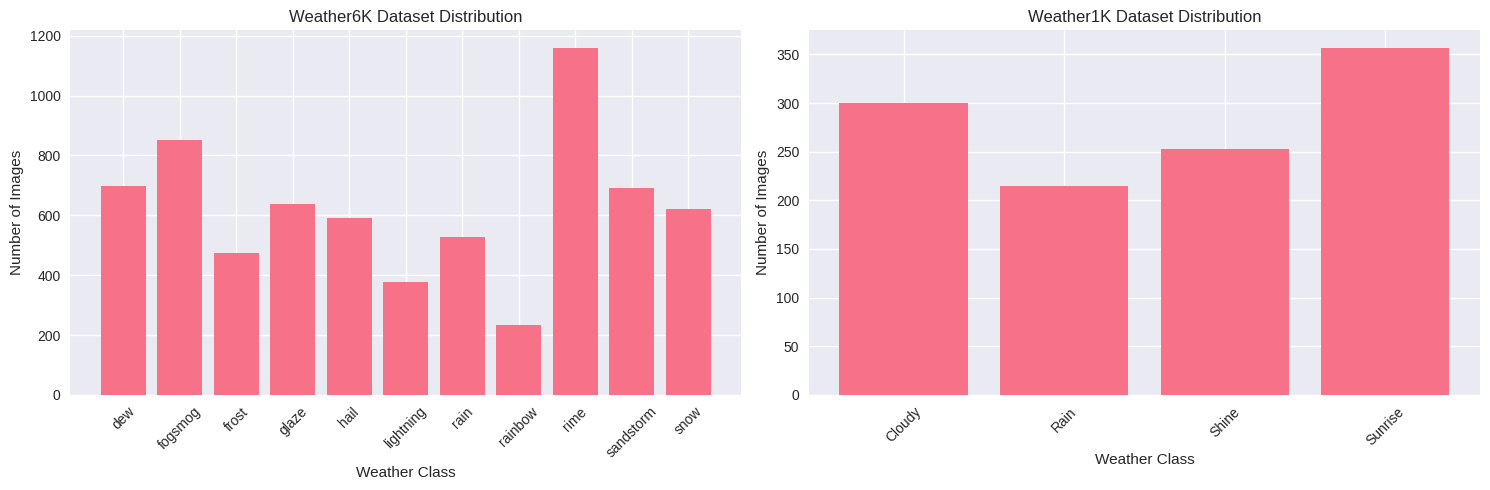

In [ ]:
# Visualize weather class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Weather6K
axes[0].bar(weather6k_stats.keys(), weather6k_stats.values())
axes[0].set_title('Weather6K Dataset Distribution')
axes[0].set_xlabel('Weather Class')
axes[0].set_ylabel('Number of Images')
axes[0].tick_params(axis='x', rotation=45)

# Weather1K
axes[1].bar(weather1k_stats.keys(), weather1k_stats.values())
axes[1].set_title('Weather1K Dataset Distribution')
axes[1].set_xlabel('Weather Class')
axes[1].set_ylabel('Number of Images')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


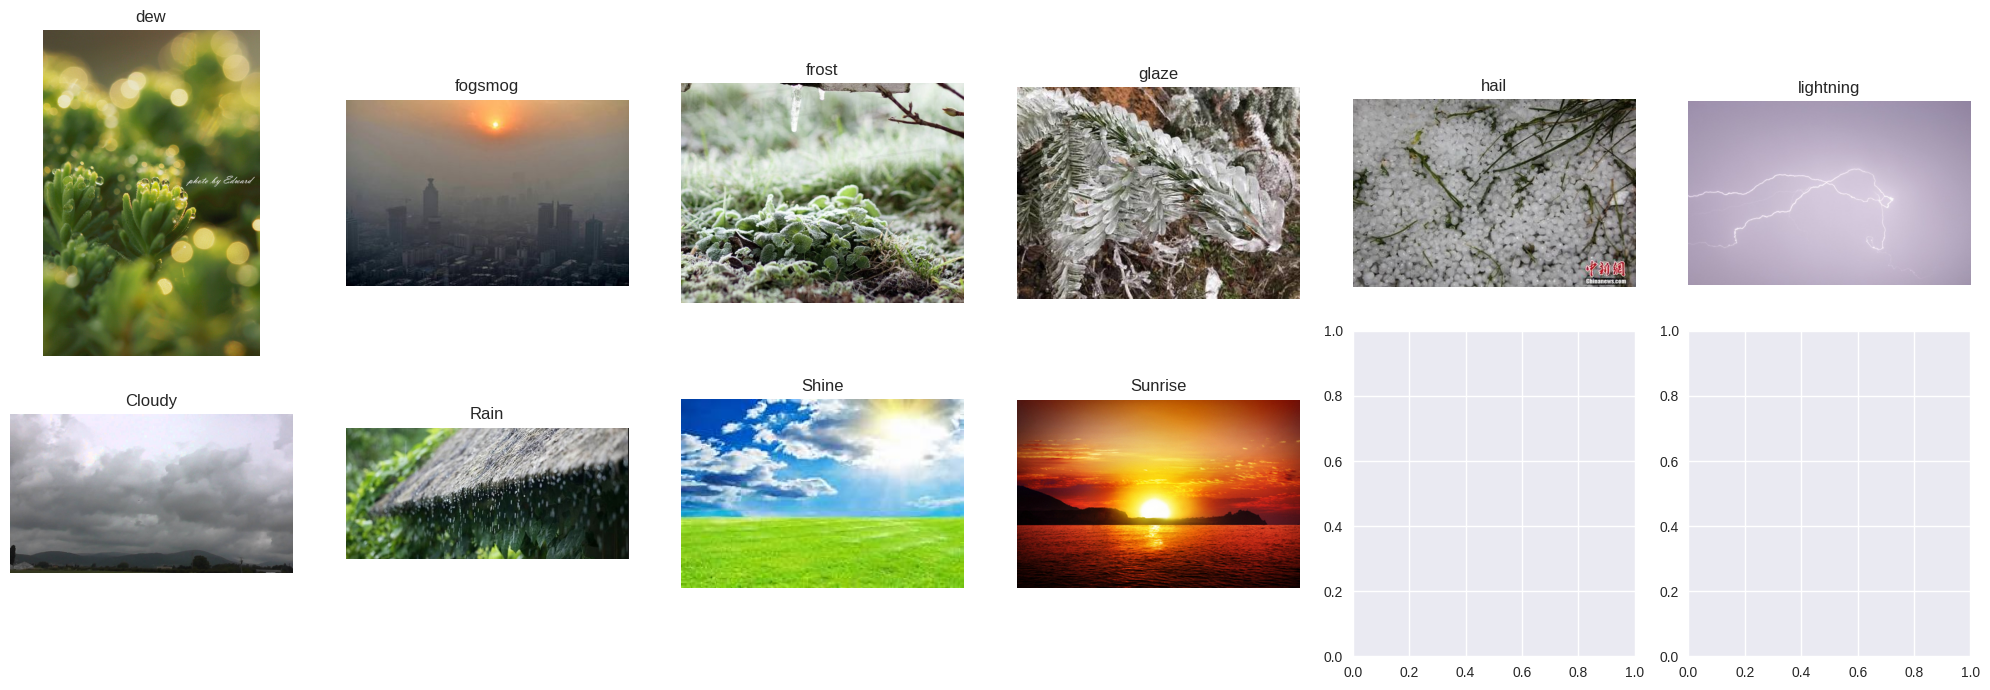

In [ ]:
# Display sample images from each weather class
fig, axes = plt.subplots(2, 6, figsize=(20, 7))
axes = axes.flatten()

idx = 0
for weather_class in list(weather6k_stats.keys())[:6]:
    weather_dir = config.WEATHER6K_DIR / weather_class
    if weather_dir.exists():
        img_files = list(weather_dir.glob('*.jpg'))
        if img_files:
            img = Image.open(img_files[0])
            axes[idx].imshow(img)
            axes[idx].set_title(f'{weather_class}')
            axes[idx].axis('off')
            idx += 1

for weather_class in list(weather1k_stats.keys())[:6]:
    weather_dir = config.WEATHER1K_DIR / weather_class
    if weather_dir.exists():
        img_files = list(weather_dir.glob('*.jpg')) + list(weather_dir.glob('*.jpeg'))
        if img_files:
            img = Image.open(img_files[0])
            axes[idx].imshow(img)
            axes[idx].set_title(f'{weather_class}')
            axes[idx].axis('off')
            idx += 1

plt.tight_layout()
plt.show()


## 2. ICDAR 2015 Dataset Exploration


In [ ]:
# Load ICDAR train annotations
try:
    with open(config.ICDAR_DIR / 'ic15_train.json', 'r', encoding='utf-8') as f:
        icdar_train = json.load(f)
    print(f"ICDAR Train: {len(icdar_train)} images")

    # Sample annotation structure
    if len(icdar_train) > 0:
        print("\nSample annotation:")
        print(json.dumps(icdar_train[0], indent=2)[:500])
except Exception as e:
    print(f"Error loading ICDAR train: {e}")
    icdar_train = []


ICDAR Train: 5 images

Sample annotation:
Error loading ICDAR train: 0


In [ ]:
# Count images
train_images = len(list((config.ICDAR_DIR / 'train_images').glob('*.jpg')))
test_images = len(list((config.ICDAR_DIR / 'test_images').glob('*.jpg')))

print(f"ICDAR Train Images: {train_images}")
print(f"ICDAR Test Images: {test_images}")


ICDAR Train Images: 1000
ICDAR Test Images: 500


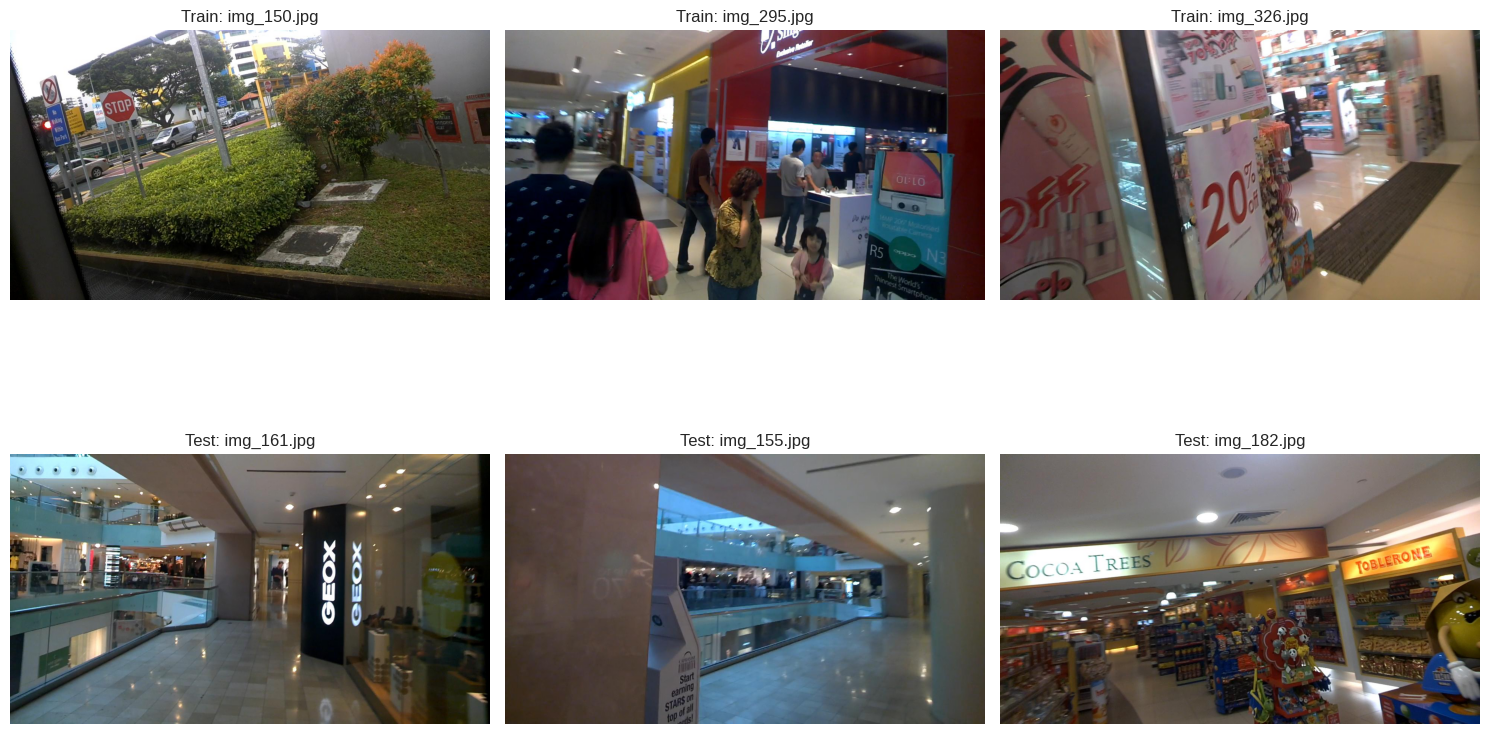

In [ ]:
# Display sample ICDAR images
train_img_dir = config.ICDAR_DIR / 'train_images'
test_img_dir = config.ICDAR_DIR / 'test_images'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Train images
train_imgs = list(train_img_dir.glob('*.jpg'))[:3]
for idx, img_path in enumerate(train_imgs):
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(f'Train: {img_path.name}')
    axes[idx].axis('off')

# Test images
test_imgs = list(test_img_dir.glob('*.jpg'))[:3]
for idx, img_path in enumerate(test_imgs):
    img = Image.open(img_path)
    axes[idx + 3].imshow(img)
    axes[idx + 3].set_title(f'Test: {img_path.name}')
    axes[idx + 3].axis('off')

plt.tight_layout()
plt.show()


## 3. RoadText-1K Dataset Exploration


In [ ]:
# Count videos
train_videos = sum(1 for _ in (config.ROADTEXT_DIR / 'Videos' / 'train').rglob('*.mp4'))
val_videos = sum(1 for _ in (config.ROADTEXT_DIR / 'Videos' / 'val').rglob('*.mp4'))
test_videos = sum(1 for _ in (config.ROADTEXT_DIR / 'Videos' / 'test').rglob('*.mp4'))

print(f"RoadText Train Videos: {train_videos}")
print(f"RoadText Val Videos: {val_videos}")
print(f"RoadText Test Videos: {test_videos}")
print(f"Total: {train_videos + val_videos + test_videos}")


RoadText Train Videos: 500
RoadText Val Videos: 200
RoadText Test Videos: 300
Total: 1000


In [ ]:
# Load sample transcription
transcription_file = config.ROADTEXT_DIR / 'Ground_truths' / 'Text_Transcription' / 'Text_0_videos_results.json.json'
if transcription_file.exists():
    with open(transcription_file, 'r', encoding='utf-8') as f:
        transcriptions = json.load(f)

    print(f"Number of videos in transcription: {len(transcriptions)}")
    print("\nSample transcription:")
    sample_video = list(transcriptions.keys())[0]
    print(f"Video {sample_video}: {list(transcriptions[sample_video].values())[:5]}")


Number of videos in transcription: 101

Sample transcription:
Video 74: ['service rd', '42 ave', '35 ave', 'stop', 'stop']


In [ ]:
# Create summary dataframe
summary_data = {
    'Dataset': ['Weather6K', 'Weather1K', 'ICDAR Train', 'ICDAR Test', 'RoadText Train', 'RoadText Val', 'RoadText Test'],
    'Count': [
        sum(weather6k_stats.values()),
        sum(weather1k_stats.values()),
        train_images,
        test_images,
        train_videos,
        val_videos,
        test_videos
    ],
    'Type': ['Weather', 'Weather', 'Text', 'Text', 'Video', 'Video', 'Video']
}

df_summary = pd.DataFrame(summary_data)
print(df_summary.to_string(index=False))


       Dataset  Count    Type
     Weather6K   6862 Weather
     Weather1K   1125 Weather
   ICDAR Train   1000    Text
    ICDAR Test    500    Text
RoadText Train    500   Video
  RoadText Val    200   Video
 RoadText Test    300   Video
